<a href="https://colab.research.google.com/github/Mahdiehrajabi/Advance-Programming2/blob/main/Retake_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import re  #Regular expression
import nltk #for Text manipulation
import string
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files

df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.dropna(inplace = True)
df.duplicated().sum()
df.dtypes


,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [6]:
df.shape

(1463, 16)

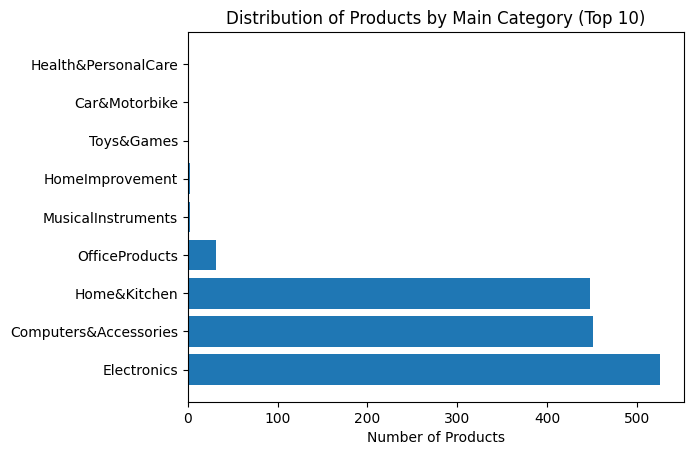

Top 10 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 448
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [15]:

# Assuming df and main_category are already defined
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
main_category_counts = df['main_category'].value_counts()[:10]

# Horizontal Bar Plot
plt.barh(range(len(main_category_counts)), main_category_counts.values)
plt.xlabel('Number of Products')  # Use xlabel for horizontal bars
plt.title('Distribution of Products by Main Category (Top 10)')
plt.yticks(range(len(main_category_counts)), main_category_counts.index)  # Display the category names on the y-axis
plt.show()

# Display the top 10 main categories
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 10 main categories:')
print(top_main_categories.to_string(index=False))


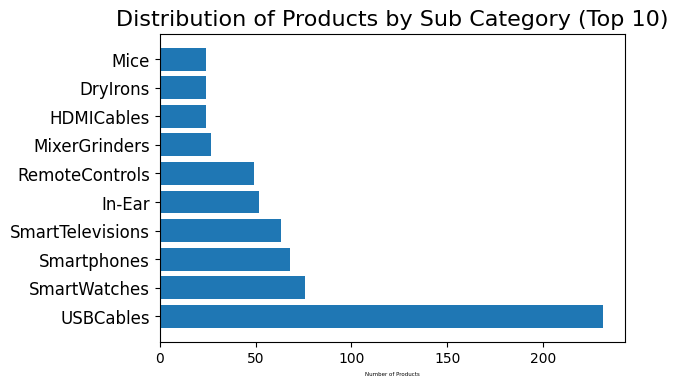

Top 10 sub categories:
    Sub Category  Number of Products
       USBCables                 231
    SmartWatches                  76
     Smartphones                  68
SmartTelevisions                  63
          In-Ear                  52
  RemoteControls                  49
   MixerGrinders                  27
      HDMICables                  24
        DryIrons                  24
            Mice                  24


In [26]:


df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]


# Assuming df and sub_category are already defined
sub_category_counts = df['sub_category'].value_counts()[:10]  # Select top 30 subcategories

# Horizontal Bar Plot with adjusted font sizes
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
plt.barh(range(len(sub_category_counts)), sub_category_counts.values)
plt.xlabel('Number of Products', fontsize=4)  # Adjust font size for x-axis label
plt.title('Distribution of Products by Sub Category (Top 10)', fontsize=16)  # Adjust font size for title
plt.yticks(range(len(sub_category_counts)), sub_category_counts.index, fontsize=12)  # Adjust font size for y-axis ticks
plt.show()

# Top 30 subcategories
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 10 sub categories:')
print(top_sub_categories.to_string(index=False))



In [30]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset for demonstration
data = {'sub_category': ['USBCables', 'SmartWatches', 'Smartphones', 'SmartTelevisions', 'In-Ear', 'RemoteControls', 'MixerGrinders', 'HDMICables', 'DryIrons', 'Mice'],
        'number_of_products': [231, 76, 68, 63, 52, 49, 27, 24, 24, 24]}

df = pd.DataFrame(data)

# Create the GUI window
root = tk.Tk()
root.title('Product Category Distribution')
root.geometry('800x600')

# Function to plot the graph
def plot_graph():
    sub_category_counts = df['sub_category'].value_counts()[:10]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(range(len(sub_category_counts)), sub_category_counts.values)
    ax.set_xlabel('Number of Products', fontsize=14)
    ax.set_title('Distribution of Products by Sub Category', fontsize=16)
    ax.set_yticks(range(len(sub_category_counts)))
    ax.set_yticklabels(sub_category_counts.index, fontsize=12)

    # Display the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Create a button to trigger the plot
plot_button = ttk.Button(root, text="Plot Sub Category Distribution", command=plot_graph)
plot_button.pack(pady=20)

# Start the GUI loop
root.mainloop()



TclError: no display name and no $DISPLAY environment variable